In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Alphabet Soup Charity dataset
charity_df = pd.read_csv("charity_data.csv")
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Count unique object values in each column
charity_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Create "ASK_AMT_BIN" column
charity_df.insert(2, "ASK_AMT_BIN", charity_df.ASK_AMT)
charity_df["ASK_AMT_BIN"].dtypes

dtype('int64')

In [5]:
# Cut and bin "ASK_AMOUNT" column
charity_df["ASK_AMT_BIN"] = pd.cut(charity_df["ASK_AMT_BIN"], 
                               bins=[0, 250000, 500000, 750000, 1000000,
                                     2500000, 5000000, 7500000, 10000000, 
                                     25000000, 50000000, 75000000, 100000000, 
                                     250000000, 500000000, 750000000, 1000000000, 
                                     2500000000, 5000000000, 7500000000, 10000000000]
                              )

In [6]:
# Count "ASK_AMT" bins
pd.value_counts(charity_df["ASK_AMT_BIN"])

(0, 250000]                  31209
(250000, 500000]               863
(1000000, 2500000]             615
(500000, 750000]               387
(2500000, 5000000]             325
(750000, 1000000]              263
(5000000, 7500000]             162
(10000000, 25000000]           158
(25000000, 50000000]           100
(7500000, 10000000]             63
(100000000, 250000000]          44
(50000000, 75000000]            32
(75000000, 100000000]           21
(250000000, 500000000]          18
(1000000000, 2500000000]        13
(500000000, 750000000]          12
(750000000, 1000000000]          9
(2500000000, 5000000000]         2
(7500000000, 10000000000]        2
(5000000000, 7500000000]         1
Name: ASK_AMT_BIN, dtype: int64

In [7]:
# Select "ASK_AMT" > 250000
charity_df = charity_df[charity_df.ASK_AMT > 250000]

# Confirm selected values
pd.value_counts(charity_df["ASK_AMT_BIN"])

(250000, 500000]             863
(1000000, 2500000]           615
(500000, 750000]             387
(2500000, 5000000]           325
(750000, 1000000]            263
(5000000, 7500000]           162
(10000000, 25000000]         158
(25000000, 50000000]         100
(7500000, 10000000]           63
(100000000, 250000000]        44
(50000000, 75000000]          32
(75000000, 100000000]         21
(250000000, 500000000]        18
(1000000000, 2500000000]      13
(500000000, 750000000]        12
(750000000, 1000000000]        9
(7500000000, 10000000000]      2
(2500000000, 5000000000]       2
(5000000000, 7500000000]       1
(0, 250000]                    0
Name: ASK_AMT_BIN, dtype: int64

In [8]:
# Create "CLASS_APP_TYPE" column - bin "CLASSIFICATION" and "APPLICATION_TYPE" columns
#class_column = charity_df["CLASSIFICATION"]
#app_column = charity_df["APPLICATION_TYPE"]

#charity_df.insert(2, "CLASS_APP_TYPE", 
#                  "(" + class_column + "," + app_column + "]"
#                       )

In [9]:
# Count "APPLICATION_TYPE"
pd.value_counts(charity_df["APPLICATION_TYPE"])

T3     2653
T9      113
T5      107
T6       68
T4       45
T7       26
T8       24
T19      16
T10      12
T2        8
T12       7
T14       3
T25       3
T13       2
T29       2
T17       1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# "APPLICATION_TYPE" column subset filter
charity_df = charity_df[charity_df.APPLICATION_TYPE == "T3"]

charity_df["APPLICATION_TYPE"].unique()

array(['T3'], dtype=object)

In [11]:
# Count "APPLICATION_TYPE"
pd.value_counts(charity_df["CLASSIFICATION"])

C1000    1689
C2000     435
C1200     282
C7000      79
C2100      46
C1700      30
C2800      14
C4000      14
C2700      12
C1270       9
C1800       7
C5000       4
C7100       4
C7200       4
C1500       4
C8000       3
C2300       3
C8200       2
C7120       2
C1900       1
C2710       1
C1240       1
C3000       1
C3200       1
C6000       1
C1820       1
C7210       1
C1234       1
C4100       1
Name: CLASSIFICATION, dtype: int64

In [12]:
# "CLASSIFICATION" column subset filter
charity_df = charity_df[charity_df["CLASSIFICATION"].isin(["C1000", "C2000", "C1200"])]

charity_df["CLASSIFICATION"].unique()

array(['C2000', 'C1000', 'C1200'], dtype=object)

In [13]:
# Count "USE_CASE"
#pd.value_counts(charity_df["# Count "USE_CASE"])

In [14]:
# "USE_CASE" column subset filter
#charity_df = charity_df[charity_df.USE_CASE != "Other"]

#charity_df["USE_CASE"].unique()

In [15]:
# Count "ORGANIZATION"
#pd.value_counts(charity_df["# Count "USE_CASE"])

In [16]:
# "ORGANIZATION" column subset filter
#charity_df = charity_df[charity_df.ORGANIZATION != "Corporation"]

#charity_df["ORGANIZATION"].unique()

In [17]:
# Create copy of "charity_df"
charity_df1 = charity_df
charity_df1

,EIN,NAME,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
7,10566033,ISRAEL EMERGENCY ALLIANCE,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
17,10603214,SAINT FRANCIS HOSPITAL SOUTH LLC,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,1,50M+,N,86380556,0
19,10605038,HABITAT FOR HUMANITY INTERNATIONAL INC,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,1,100000-499999,N,376109,0
40,10662680,TIFTON JUDICIAL CIRCUIT SHELTER INC,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,709815,0
51,10694045,FLORIDA BREAST CANCER COALITION RESEARCH FOUND...,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,1,1M-5M,N,1549352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34252,990300906,MAUI COUNTY COMMUNITY TELEVISION INC,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,3822376,0
34253,990303677,KEKAHU FOUNDATION,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,267157,0
34280,990349752,FRIENDS OF HONOLULU CITY LIGHTS,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,401661,0
34284,990355149,HABITAT FOR HUMANITY INTERNATIONAL INC,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0


In [18]:
# Drop columns
charity_df1 = charity_df1.drop(columns=["EIN", "NAME", "INCOME_AMT", "ASK_AMT"])
charity_df1

,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
7,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,1,N,1
17,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,1,N,0
19,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,1,N,0
40,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,1,N,0
51,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,1,N,0
...,...,...,...,...,...,...,...,...,...
34252,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,1,N,0
34253,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N,0
34280,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N,0
34284,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,1,N,0


In [19]:
# Reorder "IS_SUCCESSFUL" column
column_0 = charity_df1.pop("IS_SUCCESSFUL")
charity_df1.insert(0, "IS_SUCCESSFUL", column_0)
charity_df1

,IS_SUCCESSFUL,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS
7,1,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,1,N
17,0,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,1,N
19,0,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,1,N
40,0,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,1,N
51,0,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,1,N
...,...,...,...,...,...,...,...,...,...
34252,0,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,1,N
34253,0,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34280,0,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34284,0,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,1,N


In [20]:
# Create "IS_SUCCESSFUL1" column
charity_df1.insert(0, "IS_SUCCESSFUL1", charity_df1.IS_SUCCESSFUL)

In [21]:
# Convert "IS_SUCCESSFUL1" column to str
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].astype(str)

charity_df1["IS_SUCCESSFUL1"].dtypes

dtype('O')

In [22]:
# Convert "IS_SUCCESSFUL1" column values
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].replace(
    ["0", "1"],["N", "Y"]
)

charity_df1  

,IS_SUCCESSFUL1,IS_SUCCESSFUL,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS
7,Y,1,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,1,N
17,N,0,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,1,N
19,N,0,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,1,N
40,N,0,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,1,N
51,N,0,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,1,N
...,...,...,...,...,...,...,...,...,...,...
34252,N,0,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,1,N
34253,N,0,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34280,N,0,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34284,N,0,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,1,N


In [23]:
# Drop "IS_SUCCESSFUL" column
charity_df1 = charity_df1.drop(columns=["IS_SUCCESSFUL"])
charity_df1

,IS_SUCCESSFUL1,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS
7,Y,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,1,N
17,N,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,1,N
19,N,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,1,N
40,N,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,1,N
51,N,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,1,N
...,...,...,...,...,...,...,...,...,...
34252,N,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,1,N
34253,N,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34280,N,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,1,N
34284,N,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,1,N


In [24]:
# Reorder "STATUS" column
column_1 = charity_df1.pop("STATUS")
charity_df1.insert(1, "STATUS", column_1)
charity_df1

,IS_SUCCESSFUL1,STATUS,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS
7,Y,1,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,N
17,N,1,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,N
19,N,1,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,N
40,N,1,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,N
51,N,1,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,N
...,...,...,...,...,...,...,...,...,...
34252,N,1,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,N
34253,N,1,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34280,N,1,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34284,N,1,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,N


In [25]:
# Create "STATUS1" column
charity_df1.insert(1, "STATUS1", charity_df1.STATUS)

In [26]:
# Convert "STATUS1" column to str
charity_df1["STATUS1"] = charity_df1["STATUS1"].astype(str)

charity_df1["STATUS1"].dtypes

dtype('O')

In [27]:
# Convert "STATUS1" column values
charity_df1["STATUS1"] = charity_df1["STATUS1"].replace(
    ["0", "1"],["Not Active", "Active"]
)

charity_df1

,IS_SUCCESSFUL1,STATUS1,STATUS,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS
7,Y,Active,1,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,N
17,N,Active,1,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,N
19,N,Active,1,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,N
40,N,Active,1,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,N
51,N,Active,1,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,N
...,...,...,...,...,...,...,...,...,...,...
34252,N,Active,1,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,N
34253,N,Active,1,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34280,N,Active,1,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34284,N,Active,1,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,N


In [28]:
# Drop "STATUS" column
charity_df1 = charity_df1.drop(columns=["STATUS"])
charity_df1

,IS_SUCCESSFUL1,STATUS1,ASK_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS
7,Y,Active,"(7500000, 10000000]",T3,Independent,C2000,Preservation,Trust,N
17,N,Active,"(75000000, 100000000]",T3,Independent,C1000,Heathcare,Trust,N
19,N,Active,"(250000, 500000]",T3,CompanySponsored,C1000,Preservation,Trust,N
40,N,Active,"(500000, 750000]",T3,Independent,C1000,Preservation,Trust,N
51,N,Active,"(1000000, 2500000]",T3,Independent,C1200,Preservation,Trust,N
...,...,...,...,...,...,...,...,...,...
34252,N,Active,"(2500000, 5000000]",T3,Independent,C1000,Preservation,Trust,N
34253,N,Active,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34280,N,Active,"(250000, 500000]",T3,Independent,C1000,Preservation,Trust,N
34284,N,Active,"(2500000, 5000000]",T3,CompanySponsored,C1000,Preservation,Association,N


In [29]:
# Check datatypes
charity_df1.dtypes

IS_SUCCESSFUL1              object
STATUS1                     object
ASK_AMT_BIN               category
APPLICATION_TYPE            object
AFFILIATION                 object
CLASSIFICATION              object
USE_CASE                    object
ORGANIZATION                object
SPECIAL_CONSIDERATIONS      object
dtype: object

In [30]:
# Convert "ASK_AMT_BIN" column to str
charity_df1["ASK_AMT_BIN"] = charity_df1["ASK_AMT_BIN"].astype(str)

charity_df1["ASK_AMT_BIN"].dtypes

dtype('O')

In [31]:
# Generate categorical variable list and count unique object values in each column
charity_df1_cat = charity_df1.dtypes[charity_df1.dtypes == "object"].index.tolist()
charity_df1[charity_df1_cat].nunique()

IS_SUCCESSFUL1             2
STATUS1                    1
ASK_AMT_BIN               19
APPLICATION_TYPE           1
AFFILIATION                5
CLASSIFICATION             3
USE_CASE                   4
ORGANIZATION               4
SPECIAL_CONSIDERATIONS     1
dtype: int64

In [32]:
# Create a OneHotEncoder instance
One_Hot_Encoder = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using categorical variable list
One_Hot_Encoder_df = pd.DataFrame(One_Hot_Encoder.fit_transform(charity_df1[charity_df1_cat]))

# Add the encoded variable names to DataFrame
One_Hot_Encoder_df.columns = One_Hot_Encoder.get_feature_names(charity_df1_cat)
One_Hot_Encoder_df

,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,"ASK_AMT_BIN_(1000000, 2500000]","ASK_AMT_BIN_(10000000, 25000000]","ASK_AMT_BIN_(100000000, 250000000]","ASK_AMT_BIN_(1000000000, 2500000000]","ASK_AMT_BIN_(250000, 500000]","ASK_AMT_BIN_(2500000, 5000000]","ASK_AMT_BIN_(25000000, 50000000]",...,CLASSIFICATION_C2000,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2402,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2403,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2404,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
# Merge one-hot encoded features and drop originals
charity_df1 = charity_df1.merge(One_Hot_Encoder_df, left_index=True, right_index=True)
charity_df1 = charity_df1.drop(charity_df1_cat,1)
charity_df1

,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,"ASK_AMT_BIN_(1000000, 2500000]","ASK_AMT_BIN_(10000000, 25000000]","ASK_AMT_BIN_(100000000, 250000000]","ASK_AMT_BIN_(1000000000, 2500000000]","ASK_AMT_BIN_(250000, 500000]","ASK_AMT_BIN_(2500000, 5000000]","ASK_AMT_BIN_(25000000, 50000000]",...,CLASSIFICATION_C2000,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
17,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
19,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
51,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2345,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2348,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2353,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [34]:
# Split into features and target arrays
y = charity_df1["IS_SUCCESSFUL1_Y"].values
X = charity_df1.drop(["IS_SUCCESSFUL1_Y","IS_SUCCESSFUL1_N"],1).values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# Create StandardScaler instance
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Define Keras model
neural_network_model = tf.keras.models.Sequential()

# Layers
num_input_features = len(X_train[0])
neural_network_model.add(Dense(20, input_dim=num_input_features, activation="relu"))
neural_network_model.add(Dense(15, activation="relu"))
neural_network_model.add(Dense(10, activation="relu"))
neural_network_model.add(Dense(5, activation="relu"))
neural_network_model.add(Dense(1, activation="sigmoid"))

neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                780       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,316
Trainable params: 1,316
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile Sequential model
neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model = neural_network_model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.7292 - accuracy: 0.4692
Epoch 2/1000
5/5 [==============================] - 0s 798us/step - loss: 0.7155 - accuracy: 0.4615
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4538
Epoch 4/1000
5/5 [==============================] - 0s 798us/step - loss: 0.7004 - accuracy: 0.4615
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4615
Epoch 6/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4846
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5077
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5385
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5462
Epoch 10/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5538
Epoch 11/1000
5

5/5 [==============================] - 0s 598us/step - loss: 0.5876 - accuracy: 0.7538
Epoch 84/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7538
Epoch 85/1000
5/5 [==============================] - 0s 796us/step - loss: 0.5862 - accuracy: 0.7538
Epoch 86/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.5851 - accuracy: 0.7615
Epoch 87/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.7615
Epoch 88/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5841 - accuracy: 0.7615
Epoch 89/1000
5/5 [==============================] - 0s 997us/step - loss: 0.5829 - accuracy: 0.7615
Epoch 90/1000
5/5 [==============================] - 0s 997us/step - loss: 0.5819 - accuracy: 0.7615
Epoch 91/1000
5/5 [==============================] - 0s 597us/step - loss: 0.5812 - accuracy: 0.7615
Epoch 92/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7615
Epoch 93/1000


5/5 [==============================] - 0s 798us/step - loss: 0.5460 - accuracy: 0.7615
Epoch 165/1000
5/5 [==============================] - 0s 997us/step - loss: 0.5448 - accuracy: 0.7615
Epoch 166/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5434 - accuracy: 0.7615
Epoch 167/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5423 - accuracy: 0.7615
Epoch 168/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5416 - accuracy: 0.7615
Epoch 169/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5399 - accuracy: 0.7615
Epoch 170/1000
5/5 [==============================] - 0s 998us/step - loss: 0.5392 - accuracy: 0.7615
Epoch 171/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5405 - accuracy: 0.7615
Epoch 172/1000
5/5 [==============================] - 0s 998us/step - loss: 0.5421 - accuracy: 0.7615
Epoch 173/1000
5/5 [==============================] - 0s 997us/step - loss: 0.5406 - accuracy: 0.

Epoch 245/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7538
Epoch 246/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.7538
Epoch 247/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5218 - accuracy: 0.7615
Epoch 248/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7615
Epoch 249/1000
5/5 [==============================] - 0s 998us/step - loss: 0.5198 - accuracy: 0.7615
Epoch 250/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7615
Epoch 251/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7615
Epoch 252/1000
5/5 [==============================] - 0s 998us/step - loss: 0.5172 - accuracy: 0.7615
Epoch 253/1000
5/5 [==============================] - 0s 799us/step - loss: 0.5164 - accuracy: 0.7615
Epoch 254/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy:

5/5 [==============================] - 0s 798us/step - loss: 0.5023 - accuracy: 0.7615
Epoch 326/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5020 - accuracy: 0.7615
Epoch 327/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5028 - accuracy: 0.7615
Epoch 328/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.5030 - accuracy: 0.7615
Epoch 329/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7615
Epoch 330/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7615
Epoch 331/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7615
Epoch 332/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5017 - accuracy: 0.7615
Epoch 333/1000
5/5 [==============================] - 0s 798us/step - loss: 0.5020 - accuracy: 0.7615
Epoch 334/1000
5/5 [==============================] - 0s 800us/step - loss: 0.4998 - accuracy: 0.7615
Epo

5/5 [==============================] - 0s 798us/step - loss: 0.4919 - accuracy: 0.7615
Epoch 406/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4913 - accuracy: 0.7615
Epoch 407/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4910 - accuracy: 0.7615
Epoch 408/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7615
Epoch 409/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7615
Epoch 410/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4908 - accuracy: 0.7615
Epoch 411/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7615
Epoch 412/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4904 - accuracy: 0.7615
Epoch 413/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4901 - accuracy: 0.7615
Epoch 414/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7615
Epoch

5/5 [==============================] - 0s 998us/step - loss: 0.4840 - accuracy: 0.7615
Epoch 487/1000
5/5 [==============================] - 0s 795us/step - loss: 0.4822 - accuracy: 0.7615
Epoch 488/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7615
Epoch 489/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4821 - accuracy: 0.7692
Epoch 490/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4832 - accuracy: 0.7538
Epoch 491/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4837 - accuracy: 0.7538
Epoch 492/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7538
Epoch 493/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4855 - accuracy: 0.7538
Epoch 494/1000
5/5 [==============================] - 0s 598us/step - loss: 0.4864 - accuracy: 0.7538
Epoch 495/1000
5/5 [==============================] - 0s 994us/step - loss: 0.4852 - accuracy: 0.7538

5/5 [==============================] - 0s 799us/step - loss: 0.4790 - accuracy: 0.7615
Epoch 568/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7615
Epoch 569/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4786 - accuracy: 0.7615
Epoch 570/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7538
Epoch 571/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4808 - accuracy: 0.7538
Epoch 572/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7538
Epoch 573/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4825 - accuracy: 0.7538
Epoch 574/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7538
Epoch 575/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4798 - accuracy: 0.7615
Epoch 576/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7615
Epoch

5/5 [==============================] - 0s 8ms/step - loss: 0.4720 - accuracy: 0.7615
Epoch 649/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7615
Epoch 650/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.7615
Epoch 651/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4727 - accuracy: 0.7615
Epoch 652/1000
5/5 [==============================] - ETA: 0s - loss: 0.3980 - accuracy: 0.87 - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7615
Epoch 653/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7615
Epoch 654/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7615
Epoch 655/1000
5/5 [==============================] - 0s 999us/step - loss: 0.4718 - accuracy: 0.7615
Epoch 656/1000
5/5 [==============================] - 0s 796us/step - loss: 0.4715 - accuracy: 0.7615
Epoch 657/1000
5/5 [==============================] - 0s 997us/step

5/5 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7615
Epoch 729/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7615
Epoch 730/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7615
Epoch 731/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4669 - accuracy: 0.7615
Epoch 732/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4676 - accuracy: 0.7615
Epoch 733/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4674 - accuracy: 0.7615
Epoch 734/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4669 - accuracy: 0.7615
Epoch 735/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4667 - accuracy: 0.7615
Epoch 736/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4672 - accuracy: 0.7615
Epoch 737/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4677 - accuracy: 0.7615
E

5/5 [==============================] - 0s 996us/step - loss: 0.4615 - accuracy: 0.7615
Epoch 810/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7615
Epoch 811/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7615
Epoch 812/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7615
Epoch 813/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7615
Epoch 814/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4589 - accuracy: 0.7615
Epoch 815/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.7615
Epoch 816/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4585 - accuracy: 0.7615
Epoch 817/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7615
Epoch 818/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4587 - accuracy: 0.7615
Epoch 8

5/5 [==============================] - 0s 996us/step - loss: 0.4544 - accuracy: 0.7538
Epoch 891/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4545 - accuracy: 0.7538
Epoch 892/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4546 - accuracy: 0.7538
Epoch 893/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4549 - accuracy: 0.7538
Epoch 894/1000
5/5 [==============================] - 0s 994us/step - loss: 0.4561 - accuracy: 0.7538
Epoch 895/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7538
Epoch 896/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7538
Epoch 897/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4582 - accuracy: 0.7538
Epoch 898/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.7615
Epoch 899/1000
5/5 [==============================] - 0s 998us/step - loss: 0.4587 - accuracy: 0.7615
E

5/5 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7615
Epoch 972/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7538
Epoch 973/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4524 - accuracy: 0.7385
Epoch 974/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7615
Epoch 975/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.7615
Epoch 976/1000
5/5 [==============================] - 0s 798us/step - loss: 0.4539 - accuracy: 0.7615
Epoch 977/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7615
Epoch 978/1000
5/5 [==============================] - 0s 997us/step - loss: 0.4533 - accuracy: 0.7615
Epoch 979/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7615
Epoch 980/1000
5/5 [==============================] - 0s 1000us/step - loss: 0.4537 - accuracy: 0.7615
Epoch 98

In [38]:
# Data history
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


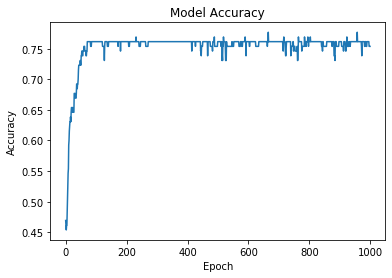

In [39]:
# Graph model accuracy
plt.plot(model.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

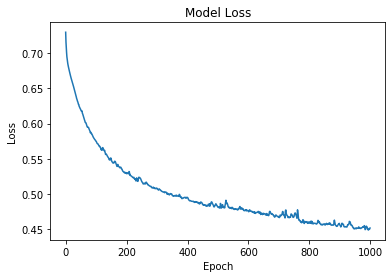

In [40]:
# Graph model loss
plt.plot(model.history["loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()